In [17]:
import os

from gnssrefl.utils import check_environment, set_environment, get_sys
from pathlib import Path

# Making sure environment variables are set - this is required to run the gnssrefl code
notebook_dir = Path.cwd().parents[0]

exists = check_environment()
if exists == False:
    #If you are running this locally - make sure the items in the exe folder have execution permissions
    set_environment(refl_code=str(notebook_dir),
                    orbits=str(notebook_dir / "orbits"),
                    exe=str(notebook_dir / "exe"))

# Set local variable of refl_code location
refl_code_loc = os.environ['REFL_CODE']
print("refl_code location:", refl_code_loc)

# import gnssrefl functions
from gnssrefl.rinex2snr_cl import rinex2snr
from gnssrefl.nmea2snr_cl import nmea2snr
from gnssrefl.quickLook_cl import quicklook
from gnssrefl.installexe_cl import installexe
from gnssrefl.gnssir_cl import gnssir
from gnssrefl.make_json_input import make_json

%matplotlib inline

refl_code location: /etc/gnssrefl/refl_code


ModuleNotFoundError: No module named 'gnssrefl.make_json_input'

In [3]:
# import the crx2rnx file which is dependent on your working OS - this is required to run the gnssrefl code
try:
    os.environ['DOCKER']
except KeyError:
    sys = get_sys()
    installexe(sys)

In [4]:
nmea2snr?

Signature:
nmea2snr(
    station: str,
    year: int,
    doy: int,
    snr: int = 66,
    year_end: int = None,
    doy_end: int = None,
    overwrite: bool = False,
    dec: int = 1,
    lat: float = None,
    lon: float = None,
    height: float = None,
    risky: bool = False,
    gzip: bool = True,
    par: int = None,
    orb: str = None,
    hour: int = 0,
    debug: bool = None,
)
Docstring:
This code creates SNR files from NMEA files.  

The NMEA files should be stored in $REFL_CODE/nmea/ssss/2023 for station ssss and year 2023
or $REFL_CODE/nmea/SSSS/2023 for station SSSS. The NMEA files should be named 
SSSS1520.23.A or ssss1520.23.A, where the day of year is 152 and year is 2023 in this example.

The SNR files created are stored with upper case if given upper case, lower case if given lower case.
Currently I have left the last character in the file name as it was given to me - capital A.
If this should be lower case for people that use lowercase station names, please let me

In [9]:
station = 'abcd'
year = 2024
doy=152
doy_end=159

nmea2snr(station, year, doy, doy_end=doy_end, lat=-44.71685833, lon=169.17849333, height=4.5)

Cartesian coordinates  [-4459056.549462077, 852345.3219280456, -4465047.396647051]
No parallel processing
SNR file already exists /etc/gnssrefl/refl_code/2024/snr/abcd/abcd1520.24.snr66
NMEA file /etc/gnssrefl/refl_code/nmea/abcd/2024/abcd1530.24.A does not exist
NMEA file /etc/gnssrefl/refl_code/nmea/abcd/2024/abcd1540.24.A does not exist
NMEA file /etc/gnssrefl/refl_code/nmea/abcd/2024/abcd1550.24.A does not exist
NMEA file /etc/gnssrefl/refl_code/nmea/abcd/2024/abcd1560.24.A does not exist
NMEA file /etc/gnssrefl/refl_code/nmea/abcd/2024/abcd1570.24.A does not exist
Try Rapid orbit products from GFZ 
100% [............................................................................] 637039 / 637039Found a sp3 file:  /etc/gnssrefl/refl_code/2024/sp3/GFZ0OPSRAP_20241580000_01D_05M_ORB.SP3
tmpfpath:  /tmp/tmpy18ooqit/abcd1580.24.A
fpath:  /etc/gnssrefl/refl_code/nmea/abcd/2024/abcd1580.24.A
Leap second offset  18
Opening temporary file :  590693592.txt
Found  261  time tags
abcd 590693

In [10]:
quicklook?

Signature:
quicklook(
    station: str,
    year: int,
    doy: int,
    snr: int = 66,
    fr: int = 1,
    ampl: float = 7.0,
    e1: float = 5,
    e2: float = 25,
    h1: float = 0.5,
    h2: float = 8.0,
    sat: int = None,
    peak2noise: float = 3.0,
    screenstats: bool = False,
    fortran: bool = None,
    plt: bool = True,
    azim1: float = 0.0,
    azim2: float = 360.0,
    ediff: float = 2.0,
    delTmax: float = 75.0,
    hires_figs: bool = False,
)
Docstring:
quickLook assessment of GNSS-IR results using SNR data. It creates two plots: one with periodograms for
four different quadrants (northwest, northeast, southeast, southwest) and the other with the RH
results shown as a function of azimuth. This plot also summarizes why the RH retrievals were accepted
or rejected in terms of the quality control parameters.  

Examples
--------
quickLook p041 2023 1 
    analyzes station p041 on day of year 1 in the year 2023 with defaults (L1, e1=5, e2=25)

quickLook p041 2023 1 -

/etc/gnssrefl/refl_code/Files/abcd  has been created.
Did not find station coordinates : abcd
Although no station coordinates were found, this is ok for quickLook.
minimum elevation angle (degrees) for this dataset:  0.944
Plot saved to  /etc/gnssrefl/refl_code/Files/abcd/quickLook_lsp.png
Plot saved to  /etc/gnssrefl/refl_code/Files/abcd/quickLook_summary.png


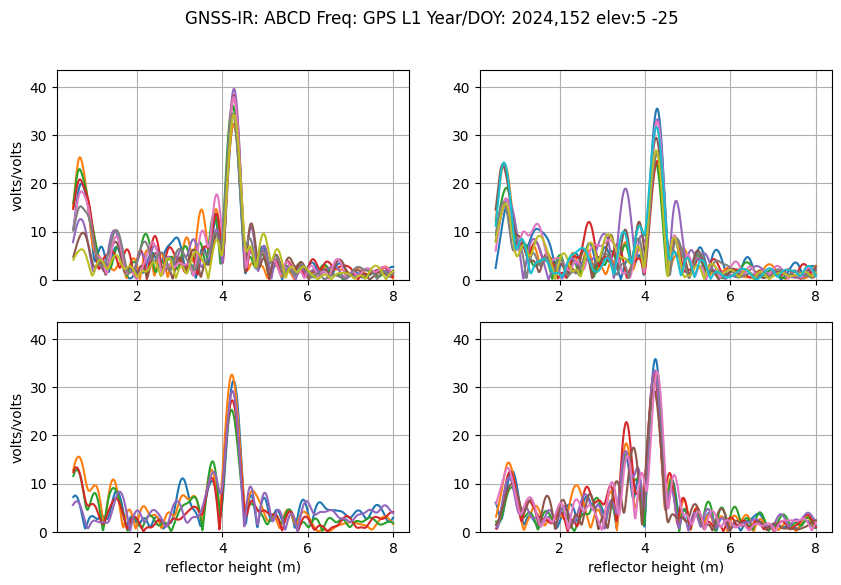

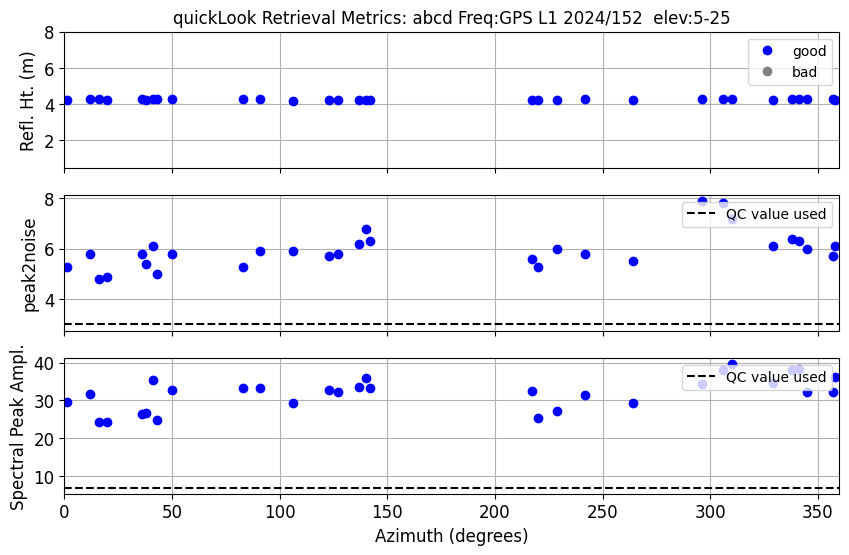

In [12]:
values, metrics = quicklook(station, year, doy=doy, plt=True)

In [ ]:
gnssir?

In [ ]:
gnssir(station, year, doy, doy_end=doy_end)